# ML_PROJECT-> EMOTION Detection ON IMAGES USING CNN
Here we have created a emotion detection model to classify emotions using 7 classes
classes- Anger, Disgust, Fear, Happy, Sad, Surprise, Neutral
The dataset is taken from kaggle and below description is given while loading.

We are using Tensorflow-2 for here and each step is specified with comments 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os# directory handling

In [2]:
#overall we are using tensorflow backend on verion 2.0.0 and keras version 2.3.1
import tensorflow as tf

In [3]:
#various librarier required for preprocessing, model creation and to show the result are used through keras libraries
import keras
from keras.models import Sequential#simplest sequential model in keras
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D #2D convolution layer (e.g. spatial convolution over images).

#for creating dense NN and for activation fuction,i.e, using activation via activation layer
#A simple and powerful regularization technique for neural networks and deep learning models is dropout,
#it uses dropout regularization technique
#Flatten-Flattens the input. Does not affect the batch size
from keras.layers import Dense, Activation, Dropout, Flatten

#Loads an image into PIL format, it support manipulation of image
from keras.preprocessing import image
#Generate batches of tensor image data with real-time data augmentation
from keras.preprocessing.image import ImageDataGenerator

#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# get the data
#images have 7 classes and in csv file their emotion are classied as 0-6 and pixels are stored in pixels column 
#total dataset is 35888 and training is 28710 and test is 7178
#80% is training and 20% is test
filname = r'D:\Carrier\dataset\fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv(r'D:\Carrier\dataset\fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [5]:
#for getting data from every images as stored in each line in csv
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [6]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [7]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [8]:
#using sklearn for train test split and splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [9]:
#importing all libraiers related to keras 
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy#Calculates how often predictions matches one-hot labels.
from keras.models import model_from_json#saving model in json and 
from keras.callbacks import ModelCheckpoint#Callback to save the Keras model or model weights at some frequency
from keras.optimizers import * #for using optimizer classes
from keras.layers.normalization import BatchNormalization#Normalize and scale inputs or activations

In [10]:
#here relu activation fuction is used(rectified linear unit)
#The Keras Conv2D parameter, filters determines the number of kernels to convolve with the input volume
#Each of these operations produces a 2D activation map
#different kernel sizes are used in each step like(5,5) and (3,3), as kernel size if according to size of each image
#2 dense layers are used and rest can be seen below in summary of model
#sequential model is used becaunse it's simple input ouput model,like take a image and output it
#it's 3 layers model first input then 1 hidden layer then 1 output layer

#defining the model and add layers in it using .add function in keras
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    #we are learning with a total of 64  filters. Max pooling is then used to reduce the spatial dimensions of the output volume.
    #Conv2D is CNN we are telling to extract 64 features with 5*5 searching marix
    #Pooling is reducing size of image to removing unnecassary data from image
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #same procedure with 128 filters
    #pooling dosen't create loss of feature
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #same procedure with 256 filters
    #we are doing it again and again to make model better as more it will learn about feature better the accuracy and prediction
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #creating 2D to 1D ussing Flatten
    model.add(Flatten())
    #adding first layer with 128 nodes
    model.add(Dense(128))
    model.add(BatchNormalization())
    #relu gives output as either 0 or 1
    model.add(Activation('relu'))
    #Dropout of 0.2 to avoid overfitting
    model.add(Dropout(0.2))
    #adding output layer with 7 nodes as finally we need to classify in 7 classes
    model.add(Dense(7))
    #as in output we don't want data in 0 or 1 so we are using softmax
    model.add(Activation('softmax'))
    
    #compling the model
    #here adam optimizer is used as it's the best
    #Categorical crossentropy loss function is used for single label categorization
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

In [11]:
path_model='model_filter.h5' # save model at this location after each epoch
K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Train on 32298 samples, validate on 3589 samples
Epoch 1/20
32298/32298 [==============================] - 3225s 100ms/step - loss: 1.6572 - accuracy: 0.3607 - val_loss: 1.4857 - val_accuracy: 0.4394
Epoch 2/20
32298/32298 [==============================] - 3150s 98ms/step - loss: 1.2972 - accuracy: 0.5052 - val_loss: 1.3042 - val_accuracy: 0.5007
Epoch 3/20
32298/32298 [==============================] - 2792s 86ms/step - loss: 1.1212 - accuracy: 0.5772 - val_loss: 1.2742 - val_accuracy: 0.5163
Epoch 4/20
32298/32298 [==============================] - 2766s 86ms/step - loss: 1.0013 - accuracy: 0.6250 - val_loss: 1.1109 - val_accuracy: 0.5768
Epoch 5/20
32298/32298 [==============================] - 2436s 75ms/step - loss: 0.8895 - accuracy: 0.6720 - val_loss: 1.1265 - val_accuracy: 0.5765
Epoch 6/20
32298/32298 [==============================] - 2220s 69ms/step - loss: 0.7538 - accuracy: 0.7244 - val_loss: 1.1107 - val_accuracy: 0.6043
Epoch 7/20
32298/32298 [==========================

In [12]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [13]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [14]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

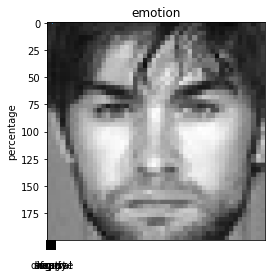

Expression Prediction: sad


In [17]:
from skimage import io
img = image.load_img(r'D:\Carrier\dataset\images\validation\sad\800.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img(r'D:\Carrier\dataset\images\validation\sad\800.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

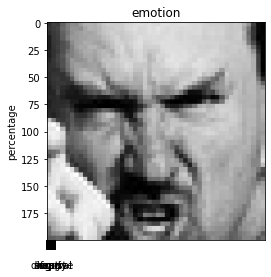

Expression Prediction: angry


In [18]:
from skimage import io
img = image.load_img(r'D:\Carrier\dataset\images\validation\angry\3137.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img(r'D:\Carrier\dataset\images\validation\angry\3137.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])